In [1]:
import napari
import napari_workflows as nw
from skimage.io import imread
from napari_workflows._io_yaml_v1 import load_workflow, save_workflow      
import inspect
import magicgui
from functools import partial
from napari_tools_menu import make_gui
from inspect import Signature, signature
from functools import partial

def signature_w_kwargs_from_function(function, arg_vals: list) -> Signature:
    
    # getting the keywords corresponding to the values
    keyword_list = list(signature(function).parameters.keys())

    # creating the kwargs dict
    kw_dict = {}
    for kw, val in zip(keyword_list, arg_vals):
        kw_dict[kw] = val
        
    possible_input_image_names = ['image',
                                  'label_image',
                                  'binary_image'
                                 ]
    for name in possible_input_image_names:
        try:
            kw_dict.pop(name) # we are making an assumption that the input will aways be this
        except KeyError:
            pass

    
    sig = signature(partial(function, **kw_dict))
    
    return sig


file_name = r'C:/Users/ryans/Desktop/blobs.tif'
blobs = imread(file_name)

  
filename = 'workflow from napari.yaml'
workflow = load_workflow(filename)
print(workflow)

Workflow:
Result of Connected component labeling (scikit-image, nsbatwm) <- (<function connected_component_labeling at 0x00000203B0241BD0>, 'Result of Expand labels (scikit-image, nsbatwm)', False)
Result of Expand labels (scikit-image, nsbatwm) <- (<function expand_labels at 0x00000203B0241EA0>, 'Result of Threshold (Li et al 1993, scikit-image, nsbatwm)', 4.0)
Result of Gaussian (scikit-image, nsbatwm) <- (<function gaussian_blur at 0x00000203B0240F70>, 'blobs', 4.0)
Result of Percentile (scipy, nsbatwm) <- (<function percentile_filter at 0x00000203B02412D0>, 'Result of Gaussian (scikit-image, nsbatwm)', 2.0, 4.0)
Result of Threshold (Li et al 1993, scikit-image, nsbatwm) <- (<function threshold_li at 0x00000203B0240A60>, 'Result of Percentile (scipy, nsbatwm)')



In [11]:
key = 'Result of Gaussian (scikit-image, nsbatwm)'

func = workflow._tasks[key][0]
args = workflow._tasks[key][1:]

signat = signature_w_kwargs_from_function(func,args)
func.__signature__ = signat

inspect.signature(func)

<Signature (image: napari.types.ImageData, *, sigma: float = 4.0, viewer: napari.viewer.Viewer = None) -> napari.types.ImageData>

C:\Users\ryans\anaconda3\envs\np_workflows_v1\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


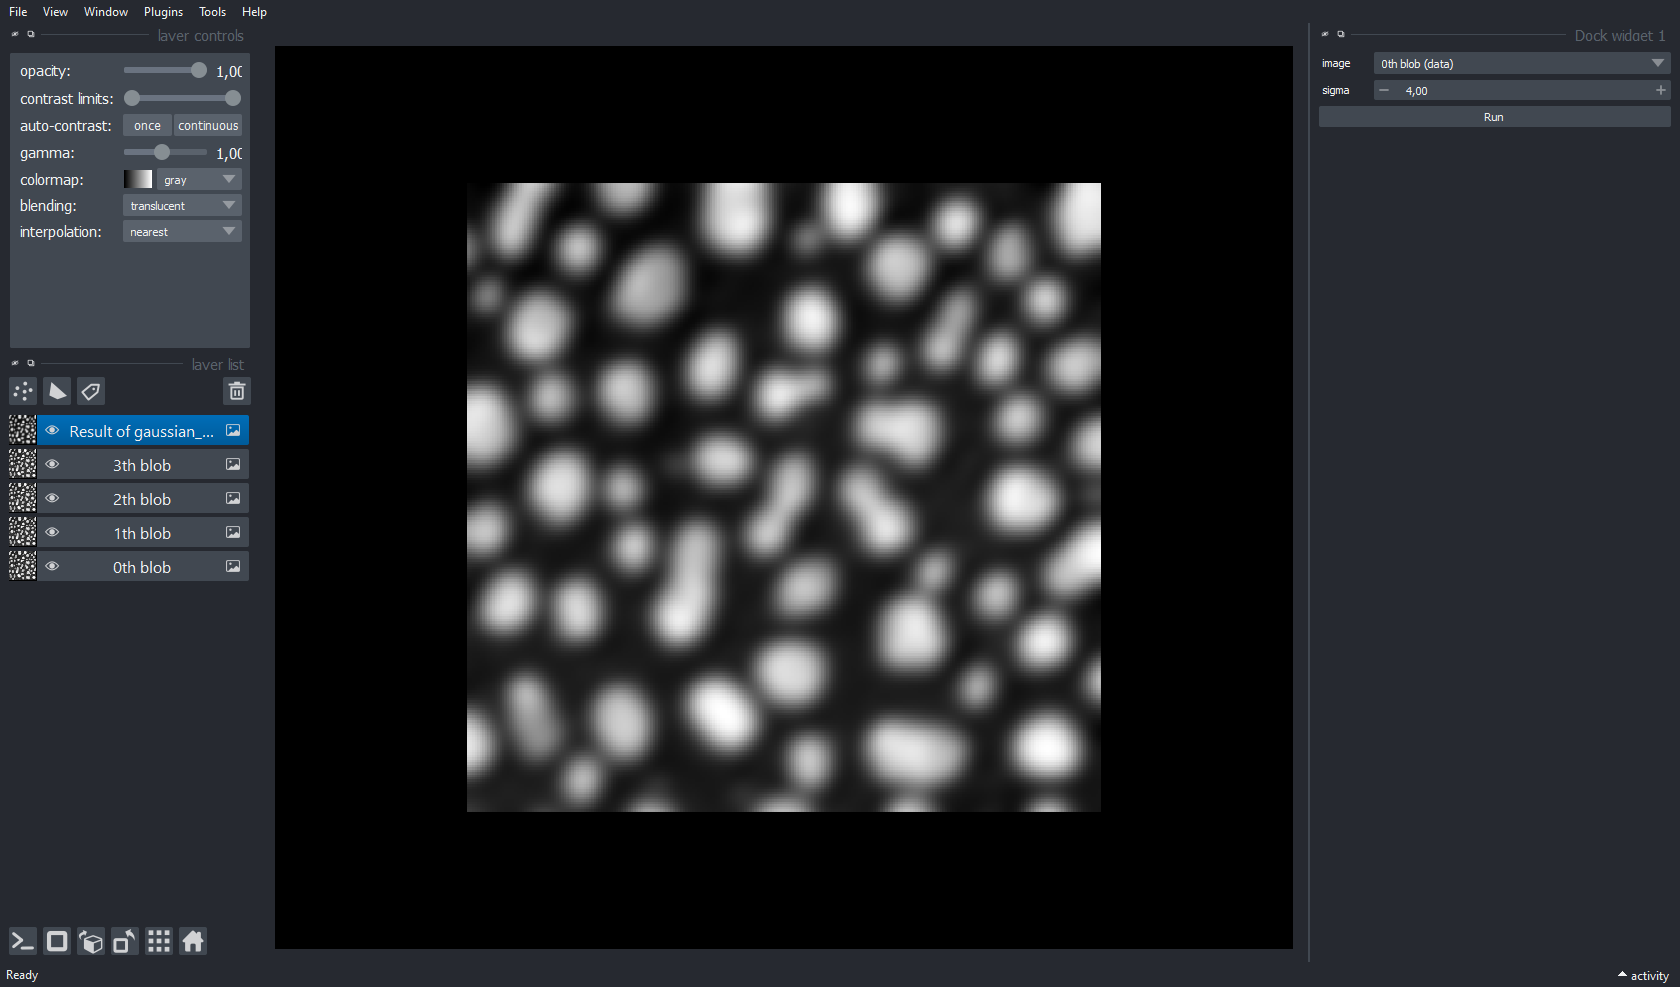

In [3]:
viewer = napari.Viewer()
for i in range(4):
    viewer.add_image(blobs, name = f'{i}th blob')
    
widget = make_gui(func, viewer)
viewer.window.add_dock_widget(widget)

layers = viewer.layers
widget(layers[f'{2}th blob'].data)

napari.utils.nbscreenshot(viewer)

Started


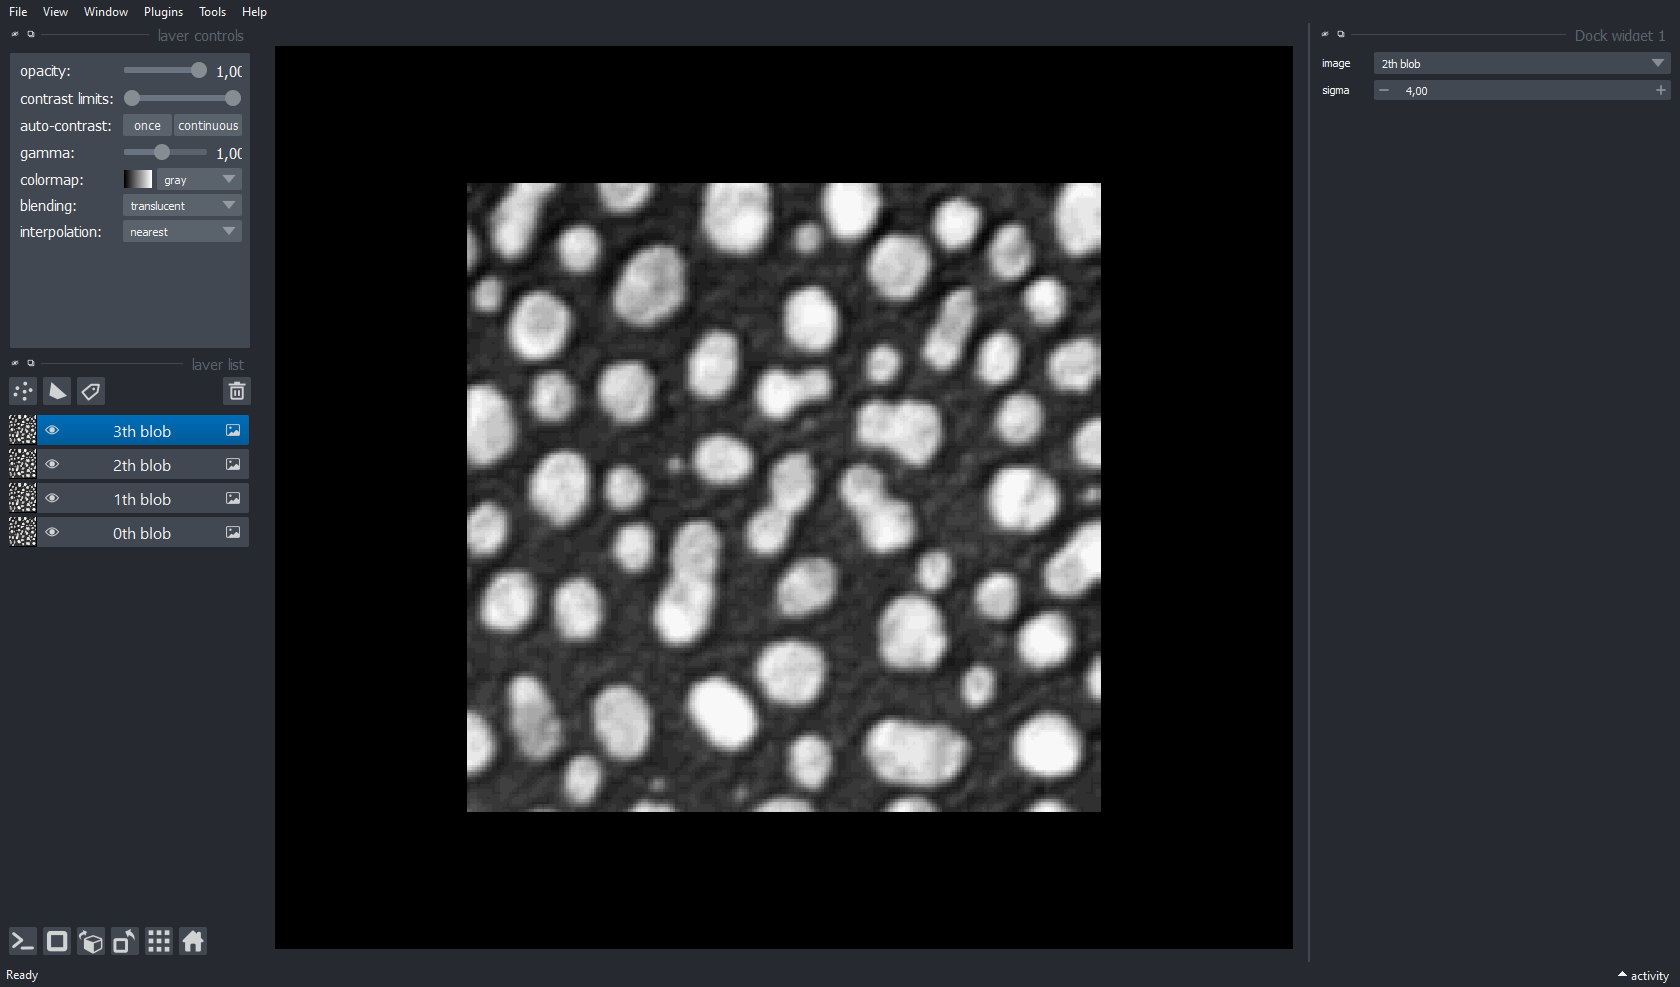

In [4]:
viewer = napari.Viewer()
for i in range(4):
    viewer.add_image(blobs, name = f'{i}th blob')

layers = viewer.layers

from magicgui.widgets import FunctionGui

class flexible_gui(FunctionGui):
    def __init__(self, function,param_options):
        super().__init__(
          function,
          #call_button=False,
          layout='vertical',
          auto_call=True,
          param_options=param_options
        )

param_options = {'image':{'choices': [layers[f'{2}th blob']]}}


wiget = MyGui(func,param_options)
viewer.window.add_dock_widget(wiget)

napari.utils.nbscreenshot(viewer)

In [15]:
wf_step = key
def get_parameter_options(workflow, wf_step, viewer, old_wf_names_to_new_mapping = None):
    

    func = workflow._tasks[wf_step][0]
    args = workflow._tasks[wf_step][1:]

    keyword_list = list(signature(func).parameters.keys())
    image_keywords = [(key,value) for key, value in zip(keyword_list,args) if isinstance(value, str)]
    image_names = [key for key, value in zip(keyword_list,args) if isinstance(value, str)]

    if old_wf_names_to_new_mapping is None:
        conversion_dict = {name: name for name in image_names}
    else:
        conversion_dict = old_wf_names_to_new_mapping

    param_options = {}
    for key, name in image_keywords:
        param_options[key] = {'choices': [viewer.layers[conversion_dict[name]]]}

    return param_options

mapping = {'blobs': f'{2}th blob'}

params = get_parameter_options(workflow, wf_step, viewer, mapping)
params   

{'image': {'choices': [<Image layer '2th blob' at 0x203c33e25f0>]}}

C:\Users\ryans\anaconda3\envs\np_workflows_v1\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


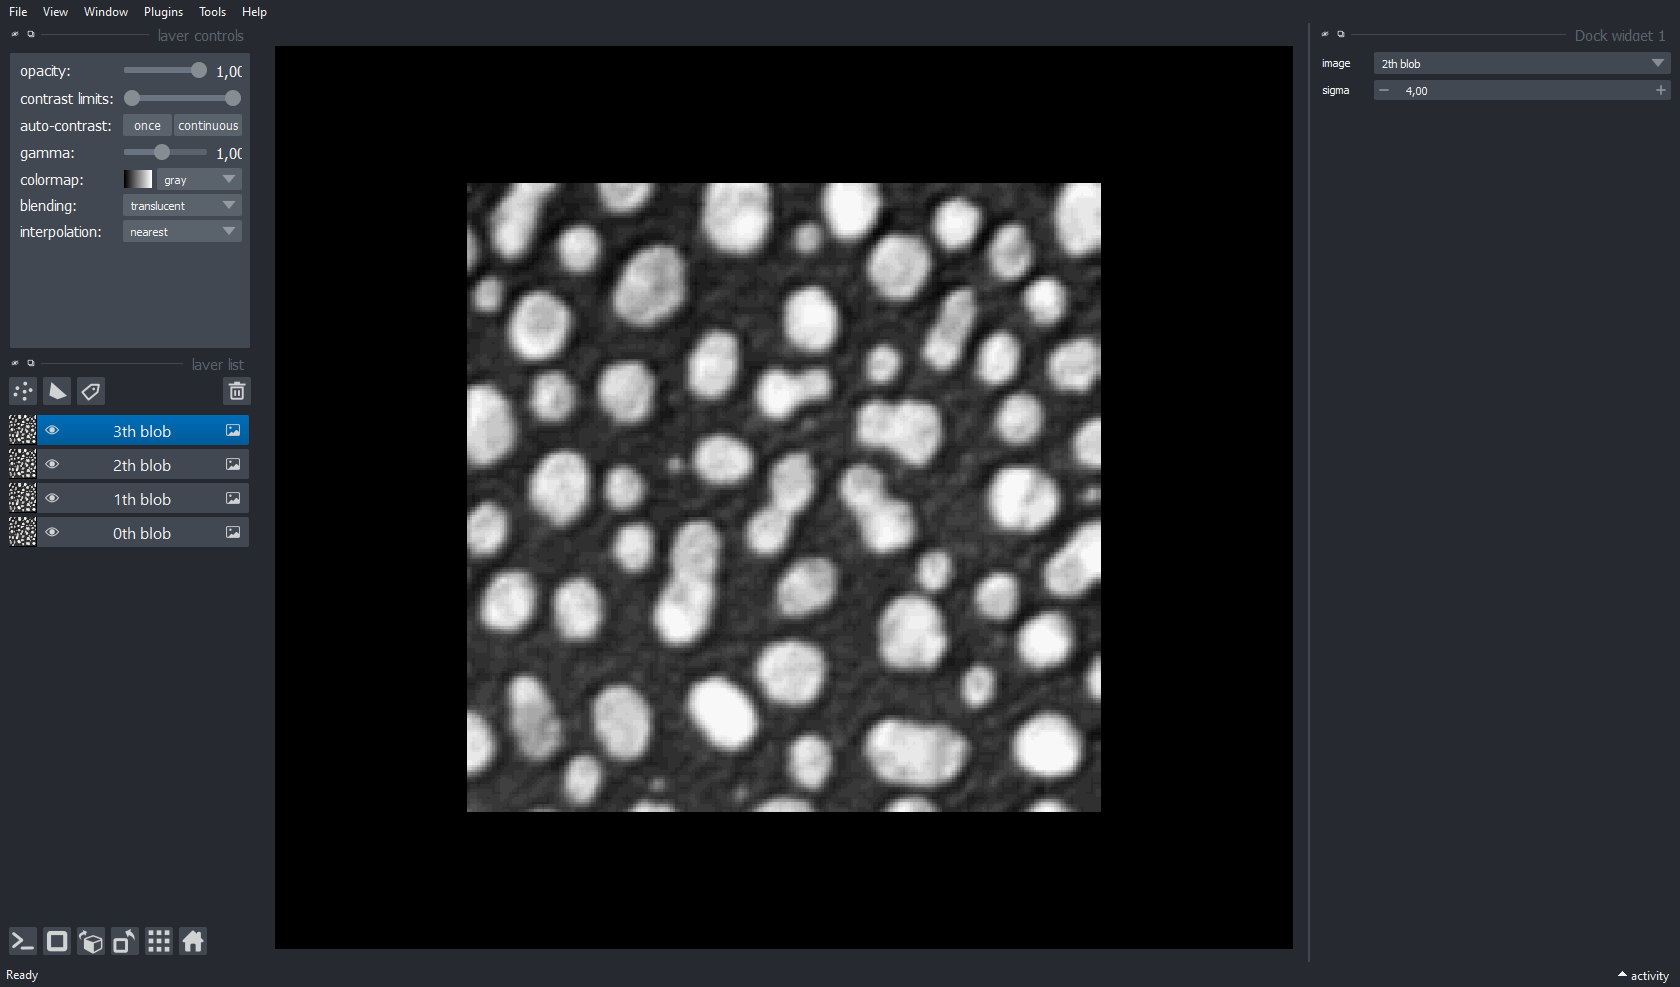

In [16]:
viewer = napari.Viewer()
for i in range(4):
    viewer.add_image(blobs, name = f'{i}th blob')

layers = viewer.layers

from magicgui.widgets import FunctionGui

class MyGui(FunctionGui):
    def __init__(self, function,param_options):
        super().__init__(
          function,
          #call_button=False,
          layout='vertical',
          auto_call=True,
          param_options=param_options
        )



wiget = MyGui(func,params)
viewer.window.add_dock_widget(wiget)

napari.utils.nbscreenshot(viewer)